In [30]:
# import pandas as pd
# import numpy as np

# import seaborn as sns
# import matplotlib.pyplot as plt

# from math import factorial

# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import factorial

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [31]:
train_df = pd.read_csv("./data/train.csv")
train_df.shape

(200000, 288)

In [32]:
test_df = pd.read_csv("./data/test.csv")
test_df.shape

(100000, 287)

In [33]:
elements = [e for e in train_df.columns if e != 'row_id' and e != 'target']

# Convert the 10 bacteria names to the integers 0 .. 9
le = LabelEncoder()
train_df['target_num'] = le.fit_transform(train_df.target)

train_df.shape, test_df.shape

((200000, 289), (100000, 287))

In [34]:
np.unique(train_df.A0T0G2C8)

array([-4.29153442e-05, -4.19153442e-05, -4.09153442e-05, -3.99153442e-05,
       -3.89153442e-05, -3.79153442e-05, -3.69153442e-05, -3.59153442e-05,
       -3.49153442e-05, -3.39153442e-05, -3.29153442e-05, -3.19153442e-05,
       -3.09153442e-05, -2.99153442e-05, -2.89153442e-05, -2.79153442e-05,
       -2.69153442e-05, -2.59153442e-05, -2.49153442e-05, -2.39153442e-05,
       -2.29153442e-05, -2.19153442e-05, -2.09153442e-05, -1.99153442e-05,
       -1.89153442e-05, -1.79153442e-05, -1.69153442e-05, -1.59153442e-05,
       -1.49153442e-05, -1.39153442e-05, -1.29153442e-05, -1.19153442e-05,
       -1.09153442e-05, -9.91534424e-06, -8.91534424e-06, -7.91534424e-06,
       -6.91534424e-06, -5.91534424e-06, -4.91534424e-06, -3.91534424e-06,
       -2.91534424e-06, -1.91534424e-06, -9.15344238e-07,  8.46557617e-08,
        1.08465576e-06,  2.08465576e-06,  3.08465576e-06,  4.08465576e-06,
        5.08465576e-06,  6.08465576e-06,  7.08465576e-06,  8.08465576e-06,
        9.08465576e-06,  

In [35]:
def bias(w, x, y, z) :
    return factorial(10) / (factorial(w) * factorial(x) * factorial(y) * factorial(z) * 4 **10)
def bias_of(s) :
    w = int(s[1:s.index("T")])
    x = int(s[s.index("T")+1:s.index("G")])
    y = int(s[s.index("G")+1:s.index("C")])
    z = int(s[s.index("C")+1:])
    return factorial(10) / (factorial(w) * factorial(x) * factorial(y) * factorial(z) * 4 **10)

train_i = pd.DataFrame({col: ((train_df[col] + bias_of(col)) * 1000000).round().astype(int)
                        for col in elements})
test_i = pd.DataFrame({col: ((test_df[col] + bias_of(col)) * 1000000).round().astype(int)
                       for col in elements})

In [36]:
train_i.sample(10)

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
134593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154979,0,0,7,19,33,41,33,13,3,0,...,247,517,352,845,1023,951,69,119,164,0
7815,1,4,31,121,231,251,222,155,31,2,...,114,222,101,246,231,161,23,22,49,1
178351,2,7,103,611,1345,1718,1279,543,76,7,...,71,157,84,175,175,117,23,23,41,0
149758,0,0,10,20,0,30,10,10,0,0,...,450,1240,700,1280,1520,1000,180,350,330,10
133151,0,0,0,0,0,0,0,0,0,0,...,0,0,1000,0,1000,1000,0,0,1000,0
122368,0,8,114,655,1473,1913,1465,626,87,10,...,90,155,92,169,204,131,20,25,50,1
153561,0,0,0,0,0,0,0,0,0,0,...,0,1000,0,6000,0,0,1000,0,1000,0
52721,0,0,0,0,0,0,10,0,0,0,...,330,890,370,710,930,660,130,170,150,0
82559,0,20,60,110,170,270,160,140,0,0,...,60,190,200,220,240,120,10,60,30,0


In [37]:
train_i.sum(axis=1).min(), train_i.sum(axis=1).max()

(1000000, 1000000)

In [38]:
train_df['gcd'] = np.gcd.reduce(train_i[elements], axis=1)
test_df['gcd'] = np.gcd.reduce(test_i[elements], axis=1)

np.unique(train_df['gcd'], return_counts=True)
np.unique(test_df['gcd'], return_counts=True)

(array([    1,    10,  1000, 10000]),
 array([25208, 24951, 24930, 24911], dtype=int64))

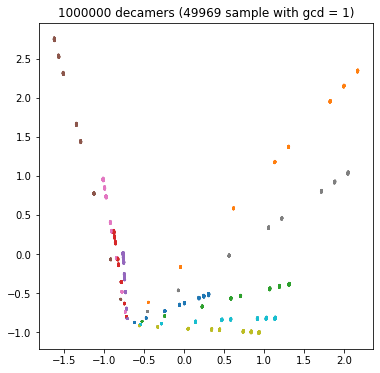

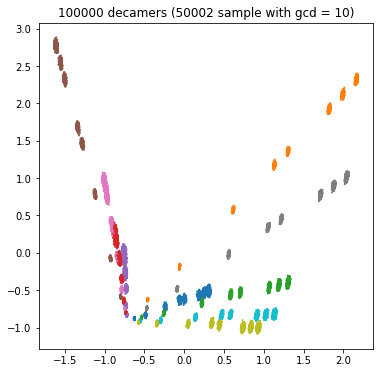

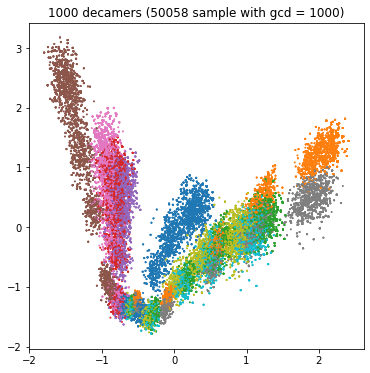

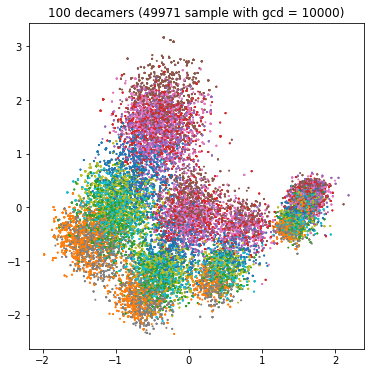

In [39]:
for scale in np.sort(train_df['gcd'].unique()) :
    pca = PCA(whiten=True, random_state=1)
    pca.fit(train_i[elements][train_df['gcd'] == scale])
    
    Xt_train = pca.transform(train_i[elements][train_df['gcd'] == scale])
    Xt_test = pca.transform(test_i[elements][test_df['gcd'] == scale])
    
    plt.figure(figsize=(6,6))
    plt.scatter(Xt_train[:,0], Xt_train[:, 1], c=train_df.target_num[train_df['gcd'] == scale], cmap = 'tab10', s=1)
    plt.title(f"{1000000 // scale} decamers ({(train_df['gcd'] == scale).sum()} sample with gcd = {scale})")
    plt.show()

In [40]:
train_df[elements].duplicated().sum()

76007

In [41]:
test_df[elements].duplicated().sum()

26779

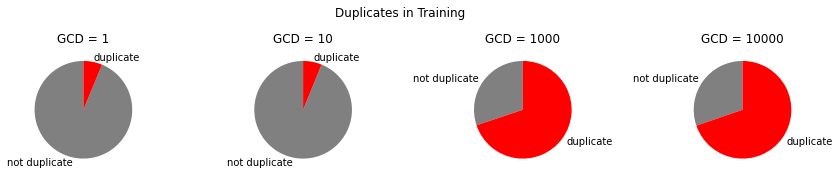

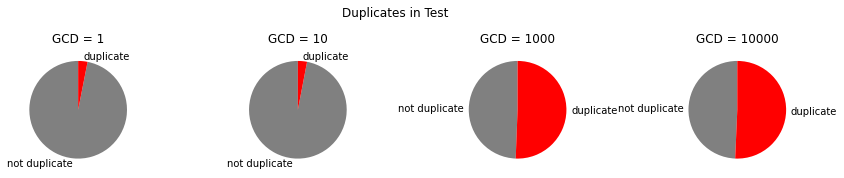

In [42]:
def plot_duplicates_per_gcd(df, title):
    plt.figure(figsize=(14, 3))
    plt.tight_layout()
    for i, gcd in enumerate(np.unique(df.gcd)) :
        plt.subplot(1, 4, i+1)
        duplicates = df[df.gcd == gcd][elements].duplicated().sum()
        non_duplicates = len(df[df.gcd == gcd]) - duplicates
        plt.pie([non_duplicates, duplicates], labels=['not duplicate', 'duplicate'],
               colors = ['gray', 'r'], startangle=90)
        plt.title(f"GCD = {gcd}")
    plt.subplots_adjust(wspace=0.8)
    plt.suptitle(title)
    plt.show()

plot_duplicates_per_gcd(train_df, title="Duplicates in Training")
plot_duplicates_per_gcd(test_df, title="Duplicates in Test")

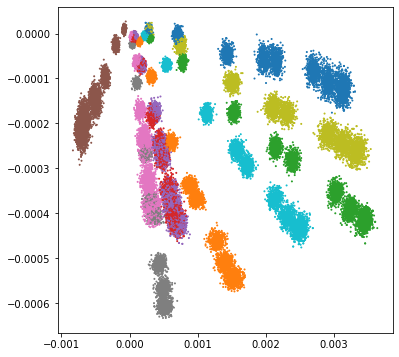

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(train_df.iloc[:, 240][train_df['gcd']==1],
           train_df.iloc[:, 181][train_df['gcd'] ==1],
           c = train_df.target_num[train_df['gcd'] == 1],
           cmap = 'tab10', s=1)
plt.show()

Bacteroides_fragilis
Cluster centers: [0.1, 0.24, 0.46, 0.64, 0.7, 0.88, 0.94, 1.0]
Cluster sizes: [ 556  576  559  557  568  528  585 1145]
Cluster unique elements: [556 576 559 557 568 528 585 824]

Campylobacter_jejuni
Cluster centers: [0.09, 0.23, 0.46, 0.64, 0.7, 0.88, 0.94, 1.0]
Cluster sizes: [ 550  542  538  578  566  560  565 1083]
Cluster unique elements: [550 542 538 578 566 560 565 789]

Enterococcus_hirae
Cluster centers: [0.09, 0.23, 0.46, 0.64, 0.7, 0.88, 0.94, 1.0]
Cluster sizes: [ 534  542  565  533  556  560  555 1111]
Cluster unique elements: [534 542 565 533 556 560 555 804]

Escherichia_coli
Cluster centers: [0.11, 0.24, 0.46, 0.64, 0.7, 0.88, 0.94, 1.0]
Cluster sizes: [ 552  524  538  545  549  540  553 1095]
Cluster unique elements: [552 524 538 545 549 540 553 796]

Escherichia_fergusonii
Cluster centers: [0.11, 0.24, 0.46, 0.64, 0.7, 0.88, 0.94, 1.0]
Cluster sizes: [ 547  559  543  542  553  545  566 1127]
Cluster unique elements: [547 559 543 542 553 545 566 7

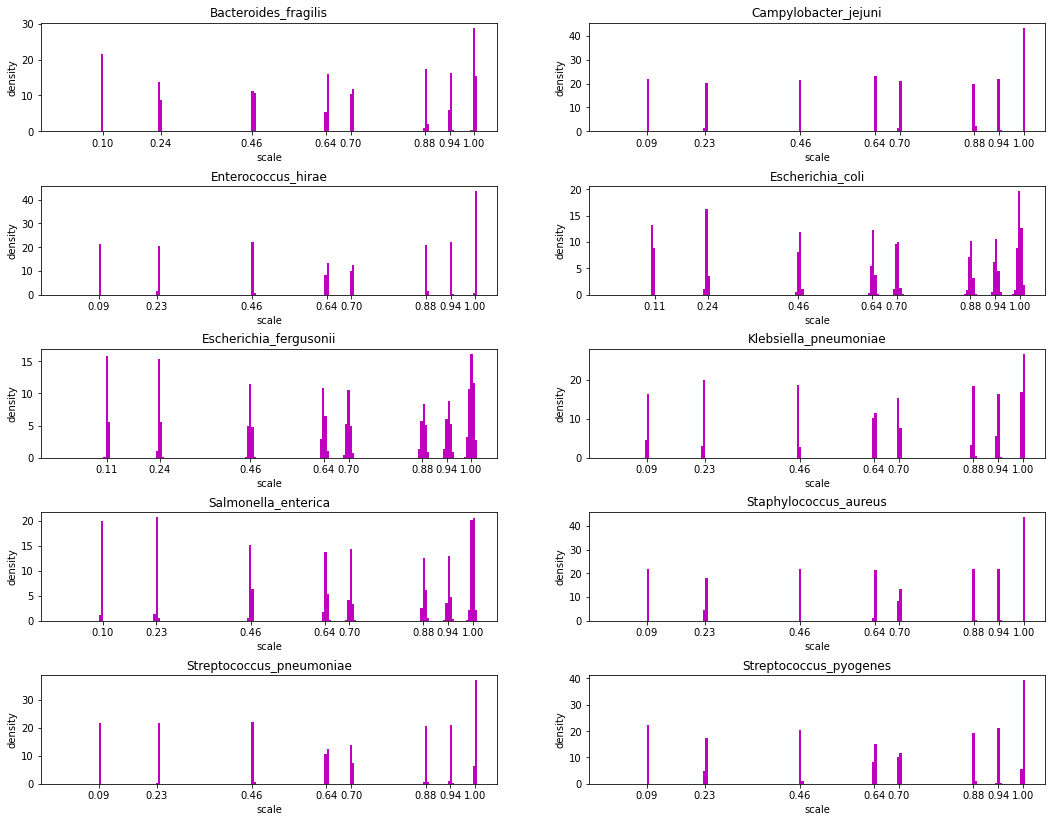

In [44]:
v = train_df[elements].abs().sum(axis=1)
chosen_gcd = 1

plt.figure(figsize=(18,14))
plt.tight_layout()
for t in range(10) :
    plt.subplot(5, 2, t+1)
    plt.title(le.inverse_transform([t])[0])
    
    vt = v[(train_df['gcd'] == chosen_gcd) & ( train_df['target_num'] == t)]
    km = KMeans(n_clusters=8)
    km.fit(vt.values.reshape(-1, 1))
    cluster_max = km.cluster_centers_.max()
    print(le.inverse_transform(np.array([t]))[0])
    print('Cluster centers:', sorted((km.cluster_centers_ / cluster_max).ravel().round(2)))
    print('Cluster sizes:', np.unique(km.predict(vt.values.reshape(-1, 1)), return_counts=True)[1][np.argsort(km.cluster_centers_.ravel())])
    print('Cluster unique elements:',
         train_df[elements][(train_df['gcd'] == chosen_gcd) & (train_df['target_num'] == t)].
         groupby(km.predict(vt.values.reshape(-1, 1))).apply(lambda df: np.unique(df.values, axis=0).shape[0]).values[np.argsort(km.cluster_centers_.ravel())])
    print()
    
    plt.hist(vt / cluster_max, bins=np.linspace(0, (vt / cluster_max).max(), 200), color='m', density=True)
    plt.xticks(ticks=(km.cluster_centers_ / cluster_max).round(2))
    plt.xlabel('scale')
    plt.ylabel('density')
plt.subplots_adjust(hspace=0.5)
plt.show()

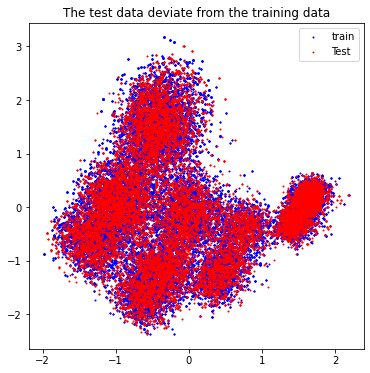

In [45]:
pca = PCA(whiten=True, random_state=1)
pca.fit(train_i[elements][train_df['gcd'] == scale])

Xt_tr = pca.transform(train_i[elements][train_df['gcd'] == scale])
Xt_te = pca.transform(test_i[elements][test_df['gcd'] == scale])

plt.figure(figsize=(6,6))
plt.scatter(Xt_tr[:, 0], Xt_tr[:, 1], c='b', s=1, label='train')
plt.scatter(Xt_te[:, 0], Xt_te[:, 1], c='r', s=1, label='Test')
plt.title("The test data deviate from the training data")
plt.legend()
plt.show()